# Point Inclusion Problem

## Using Turn Test

In [2]:
import matplotlib.pyplot as plt
from classes.Point import Point
from classes.Polygon import Polygon
from classes.Line import Line
from classes.Ray import Ray
from classes.Intersection import Intersection
from classes.helpers import left_turn,right_turn, intersection

In [3]:

def check_point_inclusion(polygon: Polygon, query_point: Point):
    all_Left = True
    all_Right = True
    for i in range(len(polygon.points) - 1):
        left = left_turn(polygon.points[i], polygon.points[i+1], query_point)
        right = right_turn(polygon.points[i], polygon.points[i+1], query_point)
        if right:
            all_Left = False
        if left:
            all_Right = False
    return all_Left or all_Right


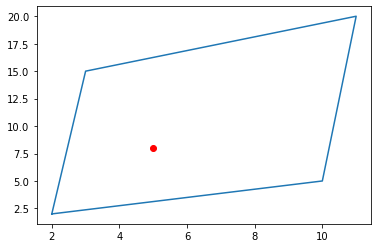

The point is inside the polygon


In [4]:
poly_points = [ Point(2,2), Point(3,15), Point(10,5), Point(11,20) ]
poly_1 = Polygon(poly_points)
poly_1.draw()
query_point = Point(5,8)
plt.plot(query_point.x, query_point.y, 'ro')
plt.show()


inside = check_point_inclusion(poly_1, query_point)
print("The point is " + ("inside" if inside else "outside") + " the polygon")


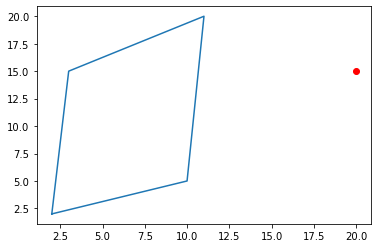

The point is outside the polygon


In [9]:
poly_points = [ Point(2,2), Point(10,5), Point(11,20), Point(3,15) ]
poly_1 = Polygon(poly_points)
poly_1.draw()
query_point = Point(20,15)
plt.plot(query_point.x, query_point.y, 'ro')
plt.show()

inside = check_point_inclusion(poly_1, query_point)
print("The point is " + ("inside" if inside else "outside") + " the polygon")


## Using Ray Casting method

In [6]:
def check_point_inclusion_using_ray(poly: Polygon, point: Point):
    count = 0
    ray = Ray(point, Point(100, point.y))
    for i in range(len(poly.points) - 1):
        line = Line(poly.points[i], poly.points[i+1])
        if not line.is_horizontal():
            if intersection(line.point_a, line.point_b, ray.point_a, ray.point_b):
                count += 1
    print("Count " + str(count))
    return "The point is " + ("outside" if count % 2 == 0 else "inside") + " the polygon"

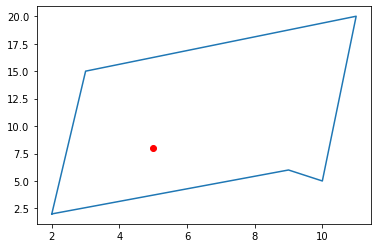

Count 1


'The point is inside the polygon'

In [10]:
poly_points = [ Point(3,15), Point(2,2), Point(10,5), Point(9,6), Point(11,20) ]
poly_1 = Polygon(poly_points)
poly_1.draw()
query_point = Point(5,8)
plt.plot(query_point.x, query_point.y, 'ro')
plt.show()

check_point_inclusion_using_ray(poly_1, query_point)

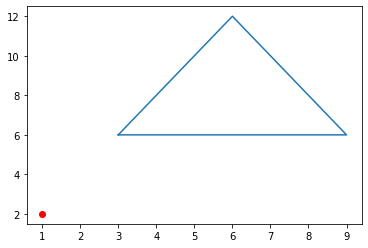

Count 0


'The point is outside the polygon'

In [8]:
poly_points = [ Point(6,12), Point(3,6), Point(9,6) ]
poly_1 = Polygon(poly_points)
poly_1.draw()
query_point = Point(1,2)
plt.plot(query_point.x, query_point.y, 'ro')
plt.show()

check_point_inclusion_using_ray(poly_1, query_point)